<a href="https://colab.research.google.com/github/yassinetbarki/Reducing-Commercial-Aviation-Fatalities/blob/main/aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Colab library to upload files to notebook
from google.colab import files
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c reducing-commercial-aviation-fatalities

 97% 40.0M/41.2M [00:01<00:00, 24.6MB/s]
100% 41.2M/41.2M [00:01<00:00, 40.4MB/s]
 98% 426M/435M [00:17<00:00, 17.7MB/s]
100% 435M/435M [00:17<00:00, 26.7MB/s]
100% 1.66G/1.67G [00:59<00:00, 55.8MB/s]
100% 1.67G/1.67G [00:59<00:00, 30.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name= 'sample_submission.csv.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done!')

Done!


In [ ]:
from zipfile import ZipFile
file_name= 'test.csv.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done!')

Done!


In [ ]:
from zipfile import ZipFile
file_name= 'train.csv.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done!')

Done!


In [ ]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,-6.695870,29.232100,24.842899,3.92134,18.447001,1.07547,3.09029,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,-6.474720,26.641399,24.138800,5.46991,20.510599,2.83354,7.10177,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,-0.088707,28.119900,26.891300,8.57886,23.162901,4.51993,12.70550,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,-0.256516,30.653601,24.247000,8.64310,19.961901,7.27575,11.45980,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,-1.953470,31.722601,25.155500,12.50030,18.746901,7.30976,8.00805,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [ ]:
import pandas as pd
df_test=pd.read_csv('test.csv')
df_test.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,-187.080002,-33.183498,-4.220780,8.178160,33.160301,33.812500,21.744699,16.293800,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,-5.145290,6.395940,33.420101,-295.013000,8.373170,29.636400,16.223000,850.288025,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,-107.236000,12.845200,1.215280,13.317000,44.435101,37.585800,29.073000,22.316099,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,-8.021180,7.427430,27.345699,-310.165009,5.389070,27.733999,7.217500,816.679016,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,37.007900,-50.334202,-11.676400,-1.143860,-17.600500,34.075600,22.912399,19.033800,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [ ]:
df.columns

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')

In [ ]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6",
"eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3",
"eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

# Exploratory Data Analysis (EDA)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sad=df.corr()


In [ ]:
df.isnull().any()

crew          False
experiment    False
time          False
seat          False
eeg_fp1       False
eeg_f7        False
eeg_f8        False
eeg_t4        False
eeg_t6        False
eeg_t5        False
eeg_t3        False
eeg_fp2       False
eeg_o1        False
eeg_p3        False
eeg_pz        False
eeg_f3        False
eeg_fz        False
eeg_f4        False
eeg_c4        False
eeg_p4        False
eeg_poz       False
eeg_c3        False
eeg_cz        False
eeg_o2        False
ecg           False
r             False
gsr           False
event         False
dtype: bool

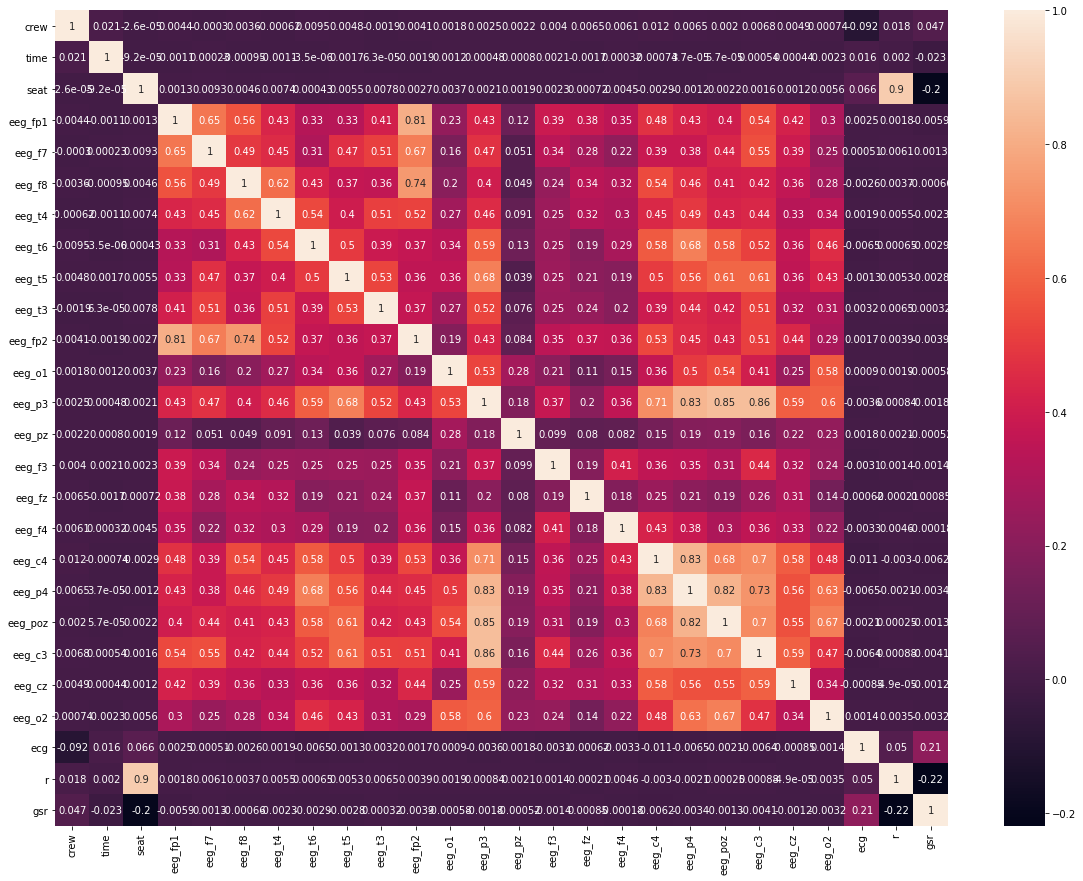

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(sad,xticklabels=sad.columns,yticklabels=sad.columns,annot=True)

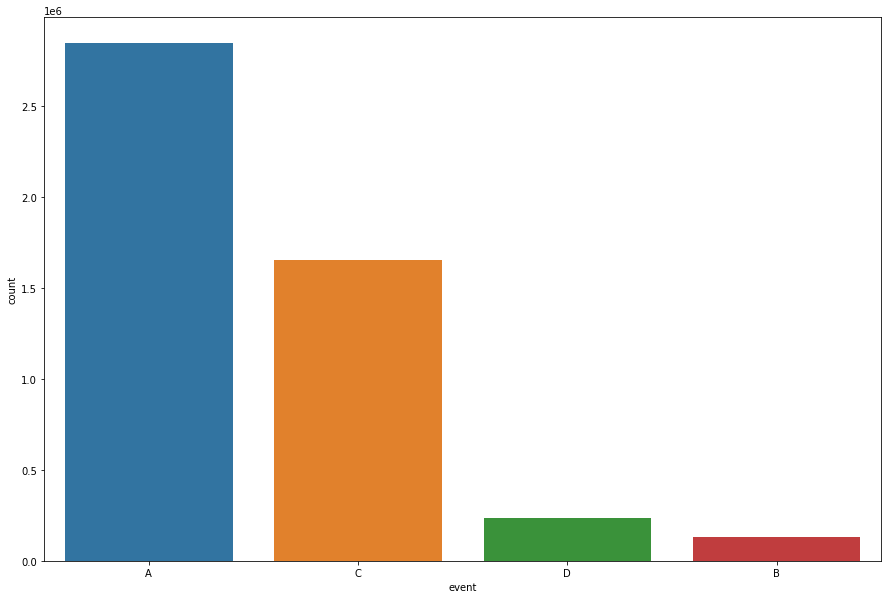

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(x='event',data=df)

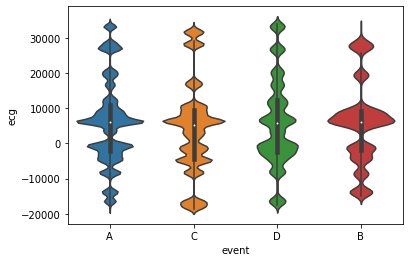

In [ ]:
# checking ECG
sns.violinplot(y='ecg',x='event',data=df)

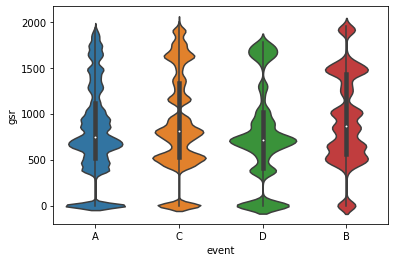

In [ ]:
# checking GSR
sns.violinplot(y='gsr',x='event',data=df)

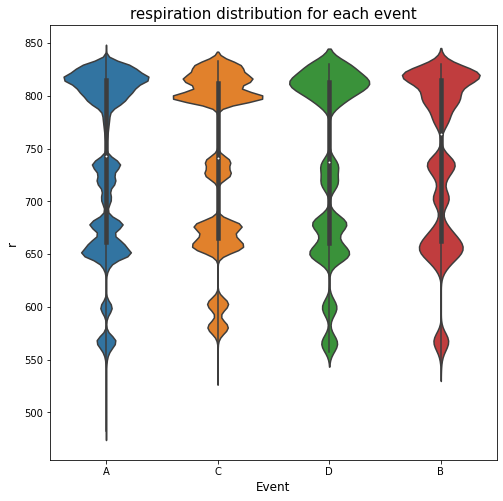

In [ ]:

plt.figure(figsize=(8,8))
sns.violinplot(x='event', y='r', data=df)
plt.ylabel("r ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("respiration distribution for each event", fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


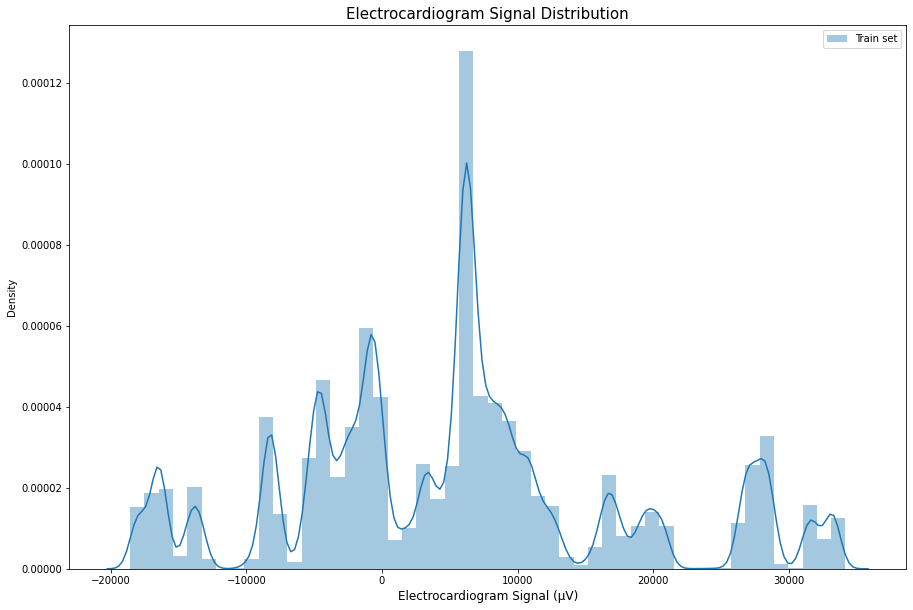

In [ ]:
plt.figure(figsize=(15,10))
# sns.distplot(test['ecg'], label='Test set')
sns.distplot(df['ecg'], label='Train set')
plt.legend()
plt.xlabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.title("Electrocardiogram Signal Distribution", fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


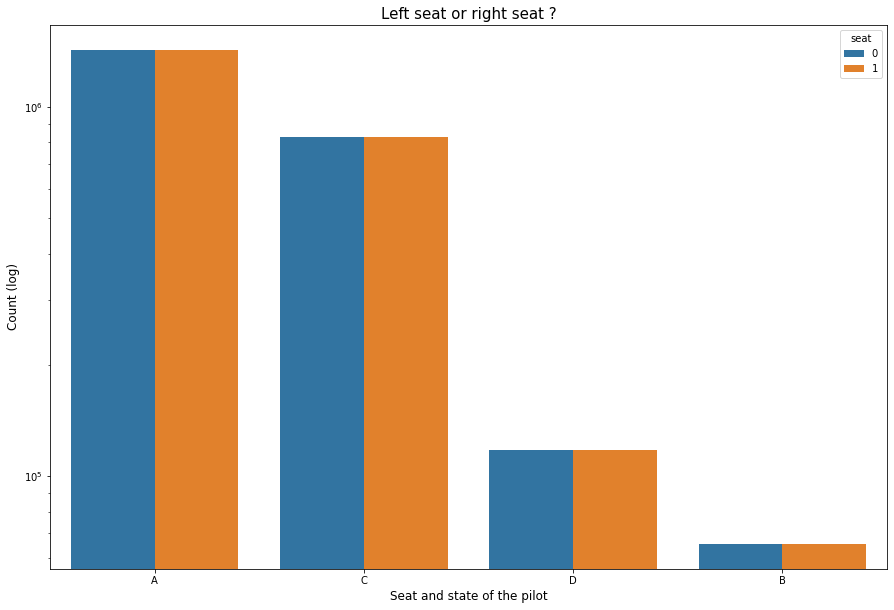

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot('event', hue='seat', data=df)
plt.xlabel("Seat and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title("Left seat or right seat ?", fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

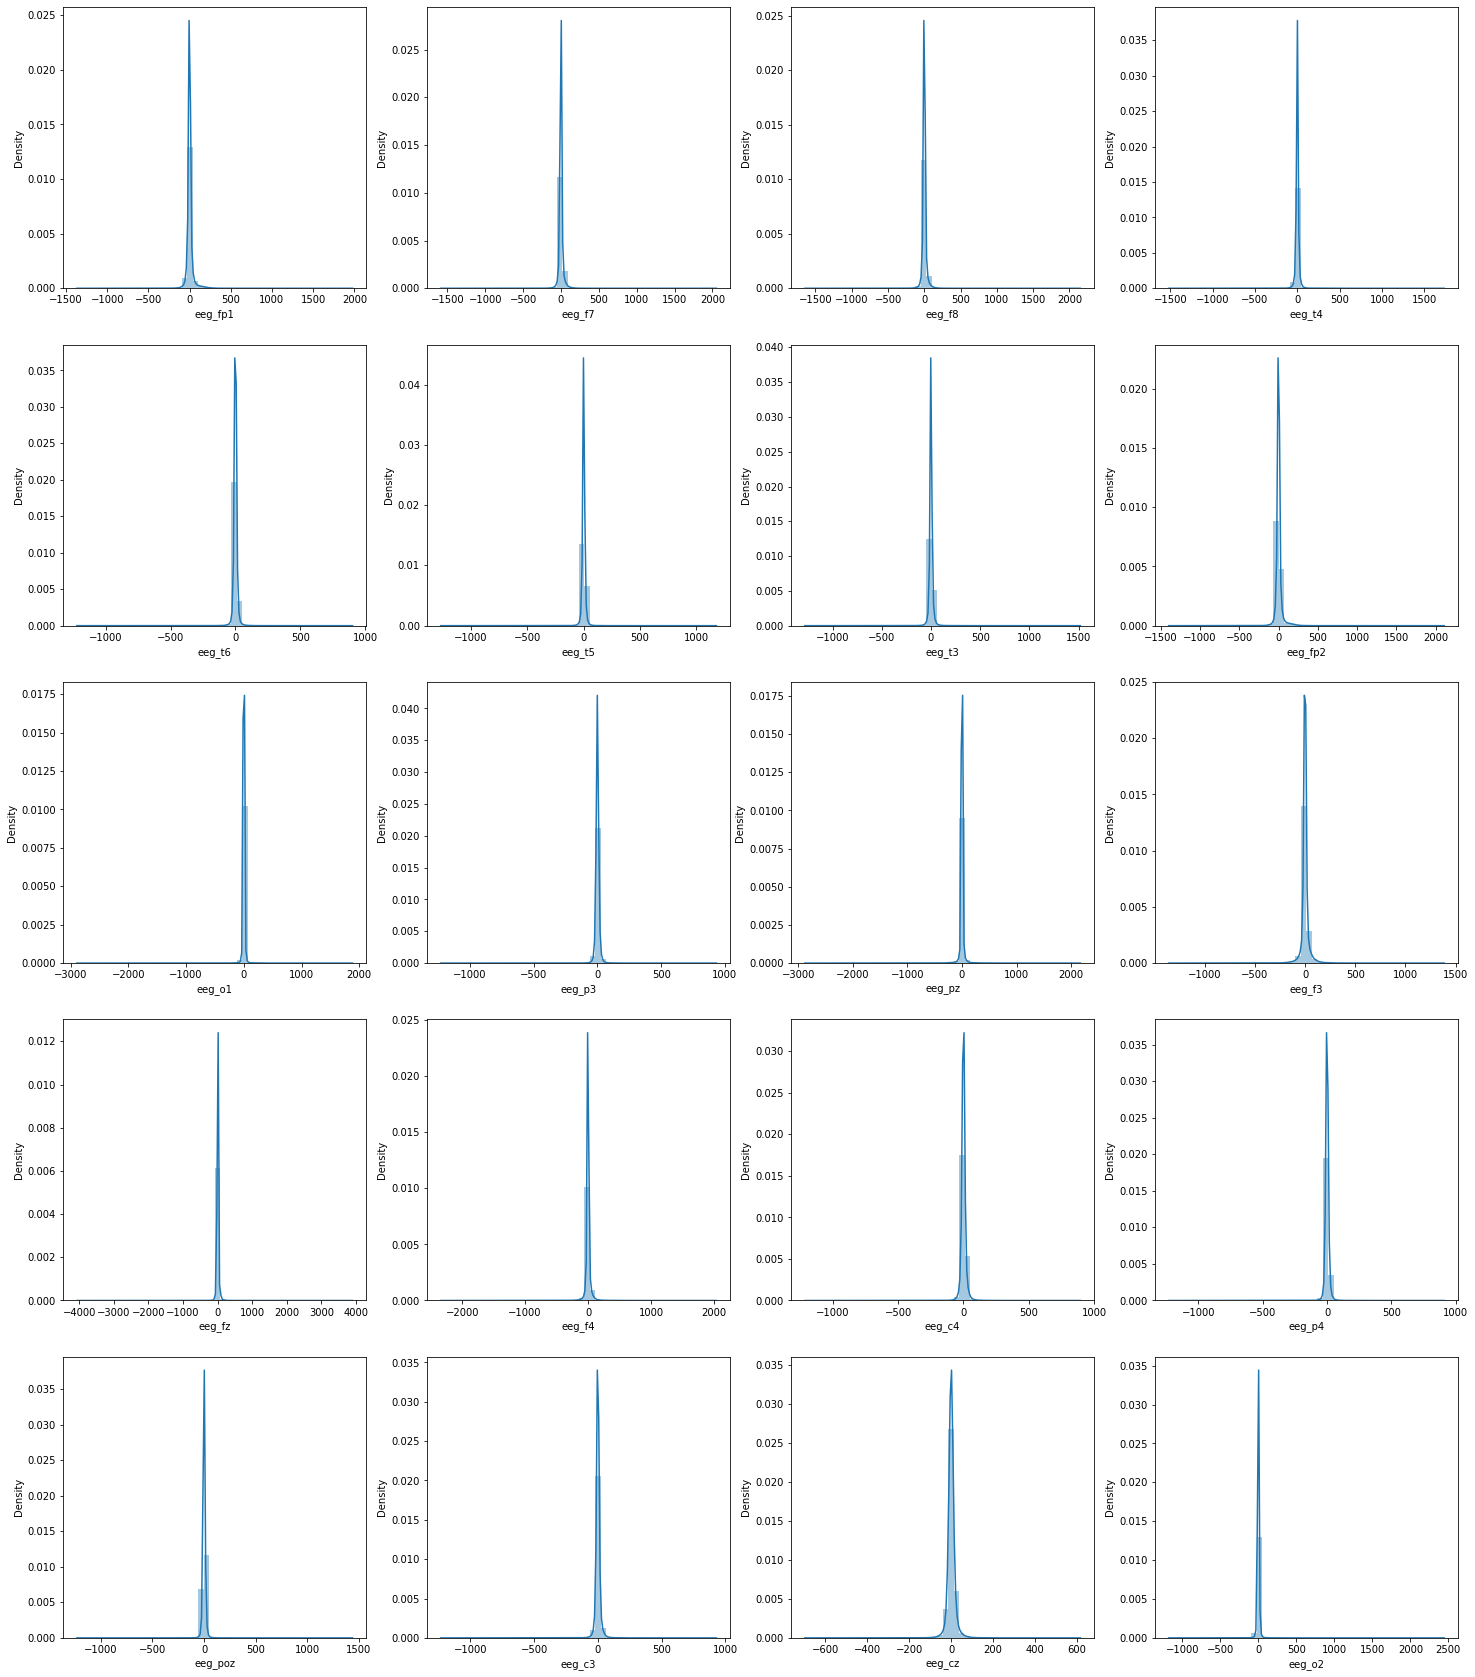

In [ ]:
from tqdm.auto import tqdm
plt.figure(figsize=(25,30))
frame=0
for i in tqdm(range(len(eeg_features))):
  frame+=1
  plt.subplot(5,4,frame)
  # sns.distplot(x='event', y=eeg_features[i], data= train.sample(10000))
  # sns.distplot(test.sample(10000)[eeg_features[i]], label='Test set')
  sns.distplot(df[eeg_features[i]], label='train set')

plt.show()

In [ ]:
# This is to be used for memory optimization because the data is very large.
# For more information about iinfo refer- https://numpy.org/doc/stable/reference/generated/numpy.iinfo.html
# np.iinfo gives maximum limits for each integer types, so based on max and minimum value  of that feature we can 
# convert the feature values into best suitable optimum datatype to reduce memory usage.
def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
import numpy as np
ddf=reduce_mem_usage(df)

Memory usage of dataframe is 1039.79 MB
Memory usage after optimization is: 241.38 MB
Decreased by 76.8%


In [ ]:
ddf.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,0,0.011719,1,-5.285156,26.781250,-9.523438,-12.796875,16.718750,33.75000,23.718750,-6.695312,29.234375,24.843750,3.921875,18.453125,1.075195,3.089844,37.375000,17.437500,19.203125,20.593750,-3.951172,14.507812,-4520.0,817.5,388.75,0
1,1,0,0.015625,1,-2.427734,28.437500,-9.320312,-3.757812,15.968750,30.43750,21.015625,-6.476562,26.640625,24.140625,5.468750,20.515625,2.833984,7.101562,31.171875,19.406250,19.687500,21.359375,1.332031,17.750000,-4520.0,817.5,388.75,0
2,1,0,0.019531,1,10.671875,30.421875,15.351562,24.718750,16.140625,32.15625,25.437500,-0.088684,28.125000,26.890625,8.578125,23.156250,4.519531,12.703125,-12.015625,19.390625,23.171875,22.406250,1.538086,22.250000,-4520.0,817.5,388.75,0
3,1,0,0.023438,1,11.453125,25.609375,2.433594,12.414062,20.531250,31.50000,19.140625,-0.256592,30.656250,24.250000,8.640625,19.968750,7.277344,11.460938,18.578125,23.156250,22.640625,19.343750,2.544922,19.000000,-4520.0,817.5,388.75,0
4,1,0,0.027344,1,7.285156,25.937500,0.113586,5.746094,19.828125,28.75000,20.578125,-1.953125,31.718750,25.156250,12.500000,18.750000,7.308594,8.007812,6.554688,22.750000,22.671875,20.296875,1.699219,22.812500,-4520.0,817.5,388.75,0


In [ ]:
# encoding dummy variables
dic = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
dic1 = {'CA':0,'DA':1,'SS':3,'LOFT':4}

df["event"] = df["event"].apply(lambda x: dic[x])
df["event"] = df["event"].astype('int8')

df['experiment'] = df['experiment'].apply(lambda x: dic1[x])
df['experiment'] = df['experiment'].astype('int8')

KeyError: ignored

In [ ]:
x=ddf.iloc[:,:-1]
y=ddf["event"]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
2227495,5,0,311.000000,0,-24.578125,-15.34375,-23.296875,2.935547,1.351562,24.484375,-3.375000,-19.187500,-14.195312,-19.468750,-10.742188,-19.937500,-20.593750,-23.546875,-33.843750,-15.328125,-15.687500,-21.906250,-20.171875,-12.671875,-2140.0,656.5,1624.00
3799613,8,0,16.140625,1,3.525391,-5.96875,27.062500,33.687500,5.000000,-7.617188,0.477295,21.390625,2.224609,-0.758789,1.835938,20.968750,5.839844,24.937500,19.281250,4.199219,3.587891,2.992188,3.164062,6.308594,4428.0,814.0,781.50
713818,2,1,242.125000,1,12.000000,16.31250,-7.449219,-6.781250,-0.892090,-4.238281,6.968750,5.253906,0.739746,0.330811,-3.191406,3.937500,-0.390381,-6.429688,-11.593750,-8.765625,-0.240112,3.431641,-3.312500,-2.164062,7764.0,813.5,0.00
3322548,7,0,293.000000,1,6.277344,2.37500,24.484375,22.921875,5.640625,-6.734375,-4.390625,9.929688,5.718750,-0.383301,23.578125,14.515625,13.585938,69.625000,16.406250,9.187500,0.296387,-1.910156,12.421875,0.238037,17680.0,831.5,715.50
60407,1,0,204.125000,1,-10.703125,-13.75000,-21.515625,0.631348,-16.140625,-16.250000,-15.023438,-15.007812,-17.781250,-19.796875,9.070312,-11.976562,22.937500,-5.890625,-8.445312,-17.812500,-11.640625,-14.242188,5.781250,-20.578125,-4352.0,817.5,492.25


In [ ]:
x_test.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
1148720,3,0,359.500000,0,-52.625000,-82.812500,61.281250,1.613281,23.703125,-70.187500,-77.937500,-21.859375,-18.046875,-25.078125,-24.109375,-88.687500,-53.937500,-263.750000,-11.421875,-25.515625,-6.035156,-64.437500,-16.828125,4.007812,5744.0,594.5,793.5
829299,2,3,120.750000,1,11.796875,12.343750,-1.007812,-1.096680,7.914062,-6.671875,4.207031,6.078125,6.988281,9.820312,7.902344,15.734375,12.210938,4.414062,0.293213,4.367188,4.820312,15.367188,14.460938,-1.849609,9536.0,814.5,0.0
689037,2,1,199.750000,0,-9.210938,-16.062500,-6.105469,-4.980469,-0.105957,-5.023438,-11.460938,-8.085938,-7.765625,-11.531250,-10.304688,-10.078125,-6.351562,-15.804688,0.802734,-6.667969,-6.199219,-2.056641,-4.402344,-1.036133,-3940.0,732.5,1312.0
4797095,13,3,299.500000,0,10.039062,-4.589844,40.468750,27.953125,26.781250,6.644531,7.851562,13.039062,6.167969,8.257812,8.507812,4.632812,15.601562,18.140625,9.046875,9.046875,6.718750,8.093750,9.546875,-0.161987,-14184.0,683.0,441.5
4539533,13,1,17.265625,1,8.117188,15.062500,1.054688,-2.521484,-7.984375,-5.730469,4.964844,-3.703125,-9.226562,-10.070312,-13.367188,4.164062,-6.035156,-3.373047,-7.593750,-8.867188,-11.257812,3.173828,-11.257812,-13.195312,-8520.0,805.0,654.5


In [ ]:
y_train.shape

(3407194,)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_test

1148720    2
829299     0
689037     0
4797095    0
4539533    0
          ..
2288821    2
3027487    0
1203223    0
584292     2
4013087    0
Name: event, Length: 1460227, dtype: int8

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

array([2, 0, 0, ..., 0, 2, 0], dtype=int8)

In [ ]:
df_test['experiment'] = df_test['experiment'].apply(lambda x: dic1[x])
df_test['experiment'] = df_test['experiment'].astype('int8')

In [ ]:
import pickle
# save the model to disk
filename = 'aricraft_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# load the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

1148720    2
829299     0
689037     0
4797095    0
4539533    0
          ..
2288821    2
3027487    0
1203223    0
584292     2
4013087    0
Name: event, Length: 1460227, dtype: int8

# Making Confusion Matri

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[854321     46      8    289]
 [    51  39136      0      0]
 [     7      0 496048      0]
 [   280      0      0  70041]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    854664
           1       1.00      1.00      1.00     39187
           2       1.00      1.00      1.00    496055
           3       1.00      1.00      1.00     70321

    accuracy                           1.00   1460227
   macro avg       1.00      1.00      1.00   1460227
weighted avg       1.00      1.00      1.00   1460227



In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0012559691061732182
Mean Squared Error: 0.003614506511658804
Root Mean Squared Error: 0.060120766060146005


Confusion matrix, without normalization
[[854321     46      8    289]
 [    51  39136      0      0]
 [     7      0 496048      0]
 [   280      0      0  70041]]
Normalized confusion matrix
[[9.99598673e-01 5.38223208e-05 9.36040362e-06 3.38144581e-04]
 [1.30145201e-03 9.98698548e-01 0.00000000e+00 0.00000000e+00]
 [1.41113385e-05 0.00000000e+00 9.99985889e-01 0.00000000e+00]
 [3.98174087e-03 0.00000000e+00 0.00000000e+00 9.96018259e-01]]


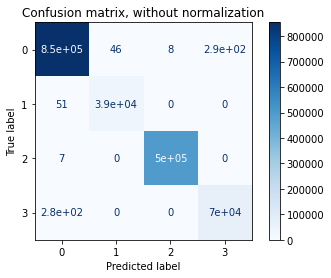

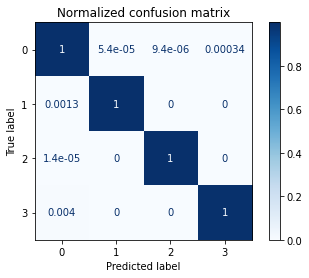

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_test[1:5]

In [ ]:
ddf.head()